# Obtenção dos Dados

In [ ]:
# Imagens de treinamento
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -O train-images-idx3-ubyte.gz
# Rótulos (classes)
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -O train-labels-idx1-ubyte.gz
# Imagens de validação
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -O t10k-images-idx3-ubyte.gz
# Rótulos de validação (classes)
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -O t10k-labels-idx1-ubyte.gz

--2020-05-22 05:31:52--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 2606:4700:3033::681c:7cc, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  62.3MB/s    in 0.2s    

2020-05-22 05:31:53 (62.3 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-05-22 05:31:55--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 2606:4700:3033::681c:7cc, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===============

In [ ]:
# Extrai os arquivos treinamento
!gunzip *.gz

gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? Y
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? Y
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? Y
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? Y


# Leitura dos Dados

In [ ]:
import numpy as np
from struct import unpack

def read_imgs(img_filename):
  ''' Esta função lê o arquivo de imagens
      da base de dados MNIST
  '''

  # Abre o arquivo
  img_file = open(img_filename,'rb')

  # Lê o cabeçalho do arquivo
  magic = unpack('>i', img_file.read(4))[0]
  total = unpack('>i', img_file.read(4))[0]
  height = unpack('>i', img_file.read(4))[0]
  width = unpack('>i', img_file.read(4))[0]

  # Verifica se o arquivo passa no teste
  # básico (este número deve ser sempre 2051)
  if magic != 2051:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  # Aqui criamos a array do NumPy que armazenará
  # as imagens
  imgs = np.zeros((total,height,width))

  # Nesse laço vamos lendo cada pixel e preenchendo
  # no array
  for k in range(total): # Cada amostra k
    for i in range(height): # Cada linha i
      for j in range(width): # Cada coluna j
        imgs[k,i,j] = ord(img_file.read(1)) # Lemos 1 byte
  
  # Retornamos o array preenchido
  return imgs

In [ ]:
def read_labels(labels_filename):
  ''' Esta função lê o arquivo de rótulos
      da base de dados MNIST
  '''

  # Abre o arquivo
  labels_file = open(labels_filename,'rb')

  # Lê o cabeçalho do arquivo
  magic = unpack('>i', labels_file.read(4))[0]
  total = unpack('>i', labels_file.read(4))[0]

  # Verifica se o arquivo passa no teste
  # básico (este número deve ser sempre 2051)
  if magic != 2049:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  # Aqui criamos a array do NumPy que armazenará
  # as imagens
  labels = np.zeros((total))

  # Nesse laço vamos lendo cada label e preenchendo
  # no array
  for k in range(total): # Cada amostra k
    labels[k] = ord(labels_file.read(1)) # Lemos 1 byte
  
  # Retornamos o array preenchido
  return labels

In [ ]:
imgs = read_imgs('train-images-idx3-ubyte')
labels = read_labels('train-labels-idx1-ubyte')

Amostra sorteada: 5106
Abaixo mostro o número 9


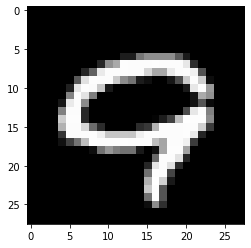

Amostra sorteada: 46328
Abaixo mostro o número 0


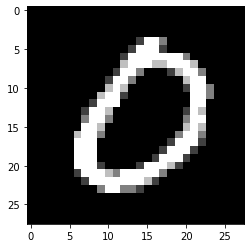

Amostra sorteada: 33626
Abaixo mostro o número 4


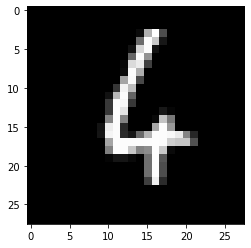

Amostra sorteada: 23859
Abaixo mostro o número 2


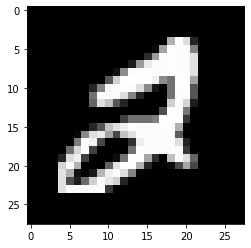

Amostra sorteada: 1671
Abaixo mostro o número 6


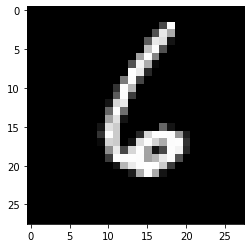

In [ ]:
from matplotlib import pyplot as plt
from numpy.random import randint

for i in  range(5):
  # Abaixo fazemos um sorteio de um número
  # inteiro de zero até o total de número
  # de amostras.

  total = imgs.shape[0]
  k = randint(0,total)

  # Cada vez que executarmos esse código
  # mostraremos um número diferente.

  print('Amostra sorteada:', k)
  print('Abaixo mostro o número', int(labels[k]))
  plt.imshow(imgs[k,:,:], cmap='gray')
  plt.show()

# Preparação dos Dados

In [ ]:
from numpy.random import shuffle

# Criamos uma lista de índices,
# inicialmente ordenada: [0, 1, 2, ... ]
idxs = list(range(total))

# Embaralhamos a lista
shuffle(idxs)

# Reorganizamos as imagens e os labels
imgs = imgs[idxs]
labels = labels[idxs]

In [ ]:
def reshape_imgs(imgs):
  # Aqui recebemos as dimensões das imagens
  total, width, height = imgs.shape

  # Vamos colocar os píxels de cada imagem
  # enfileirados em uma única linha de tamanho
  # 28*28 = 784
  inputs_size = width*height
  X = np.zeros((total,inputs_size))

  # No laço abaixo fazemos duas coisas:
  # 1. enfileiramos cada imagem em uma linha
  # 2. normalizamos os valores para o intervalo
  #    de 0 a 1 (dividindo por 255)
  for i in range(total):
    X[i,:] = np.reshape(imgs[i,:,:],(1,inputs_size)) / 255.0

  return X

In [ ]:
# Esta linha de código chama a função acima
X = reshape_imgs(imgs)

In [ ]:
# Esse será o array com as saídas desejadas
Y_desired = np.zeros((total,10))

# Esse array coloca cada categoria num
# vetor linha
labels_ref = np.array(range(10))

# No laço abaixo fazemos aquele "truque"
# de aplicar o teste de igualdade usando
# o "==" como uma operação no vetor linha
# das categorias. O resultado será verdadeiro
# apenas para a posição onde está o elemento
# igual à categoria, e falso nas demais
# posições. Depois apenas convertemos
# esse array do formato booleano para
# o formato float (falso vira 0.0,
# verdadeiro vira 1.0)
for i in range(total):
  Y_desired[i,:] = (labels[i] == labels_ref).astype('float')

# Funções Auxiliares


In [ ]:
def sigmoid(arr_x):
    return 1.0 / ( 1.0 + np.exp(-arr_x) )

In [ ]:
def softmax(arr_x):
    arr_ex = np.exp(arr_x)
    s = np.sum(arr_ex)
    return arr_ex/s

# Rede Neural

In [ ]:
from numpy.random import random

class Perceptron:
    # 784 (inputs) => 256 => 64 => 10 (outputs (one-hot encoding))
    def __init__(self, n_inputs=784, n_hidden_layer=2, n_hidden=np.array([256, 64]), n_outputs=10):
        # Weights
        self.w_ih = random( (n_hidden[0], n_inputs)    )*2.0 - 1.0
        self.w_hh = random( (n_hidden[1], n_hidden[0]) )*2.0 - 1.0
        self.w_ho = random( (n_outputs,   n_hidden[1]) )*2.0 - 1.0

        # Biases
        self.b_h0 = random( (n_hidden[0], 1) )*2.0 - 1.0
        self.b_h1 = random( (n_hidden[1], 1) )*2.0 - 1.0
        self.b_o  = random( (n_outputs,   1) )*2.0 - 1.0

        # Learning rate
        self.eta = 0.5

    def forward(self, x):
        n_inputs = 784
        x = np.reshape(x, (n_inputs, 1))

        # inputs(784,1) -> hidden_layer0(256,784)
        self.s_h0 = np.dot(self.w_ih, x) + self.b_h0
        self.z_h0 = sigmoid(self.s_h0) #(256x1)

        # hidden_layer0 -> hidden_layer1
        self.s_h1 = np.dot(self.w_hh, self.z_h0) + self.b_h1
        self.z_h1 = sigmoid(self.s_h1) #(64,1)

        # hidden_layer1 -> output
        self.s_o = np.dot(self.w_ho, self.z_h1) + self.b_o
        self.z_o = sigmoid(self.s_o) #(z_o.shape = 10,1)

        return softmax(self.z_o)

    def backpropagation(self, x, y_desired):
        # x.shape = (784, 1)
        # y_desired.shape = (10, 1)
        x = np.reshape(x, (784, 1))
        y_desired = np.reshape(y_desired, (10, 1))

        y = self.forward(x)

        err = (np.sum((y - y_desired)**2)) / 2.0

        # deltas
        self.d_o  = (y - y_desired)                * (self.z_o  * (1.0 - self.z_o)) # Multiplicação elemento a elemento
        self.d_h1 = np.dot(self.w_ho.T, self.d_o ) * (self.z_h1 * (1.0 - self.z_h1))
        self.d_h0 = np.dot(self.w_hh.T, self.d_h1) * (self.z_h0 * (1.0 - self.z_h0))

        # derivadas parciais (Gradiente)
        self.dw_ho = np.dot(self.d_o, self.z_h1.T)
        self.db_o = self.d_o

        self.dw_hh = np.dot(self.d_h1, self.z_h0.T)
        self.db_h1 = self.d_h1

        self.dw_ih = np.dot(self.d_h0, x.T)
        self.db_h0 = self.d_h0

        # Ajuste dos pesos na direção oposta ao gradiente
        self.w_ho = self.w_ho - self.eta * self.dw_ho
        self.w_hh = self.w_hh - self.eta * self.dw_hh
        self.w_ih = self.w_ih - self.eta * self.dw_ih

        # Ajuste dos biases na direção oposta ao gradiente
        self.b_o  = self.b_o  - self.eta * self.db_o
        self.b_h1 = self.b_h1 - self.eta * self.db_h1
        self.b_h0 = self.b_h0 - self.eta * self.db_h0

        return err

    def train(self, X, Y_desired):
        # X.shape = (60.000, 784)
        # Y_desired.shape = (60.000, 10)

        total = X.shape[0]
        acc = 0.0

        for i in range(total):
            err = self.backpropagation(X[i,:], Y_desired[i,:])
            acc += err

        # Mean Squared Error 
        return acc / total

# Testes

In [ ]:
p = Perceptron()

In [ ]:
import time

total = 20
errors = np.zeros(total)

for i in range(total):
    start_time = time.time()
    err = p.train(X, Y_desired)
    finish_time = time.time() - start_time
    minutes = int(finish_time/60)
    seconds = int(finish_time%60)
    print(str(i) + ': Error = ' + str(err) + '\t training time = ' + str(minutes) + ':' + str(seconds) + 's')
    
    errors[i] = err

0: Error = 0.35118697200391763	 training time = 1:47s
1: Error = 0.3362108428578835	 training time = 1:46s
2: Error = 0.3348059942738376	 training time = 1:47s
3: Error = 0.33347011874000687	 training time = 1:46s
4: Error = 0.33308502144513574	 training time = 1:53s
5: Error = 0.3325324122868865	 training time = 1:47s
6: Error = 0.3322440476197071	 training time = 1:47s
7: Error = 0.3320012416977077	 training time = 1:47s
8: Error = 0.33191003641710587	 training time = 1:46s
9: Error = 0.33178185043863767	 training time = 1:44s
10: Error = 0.33152618195409334	 training time = 1:46s
11: Error = 0.33124846925134577	 training time = 1:49s
12: Error = 0.3312112360537571	 training time = 1:52s
13: Error = 0.3308788853262391	 training time = 1:51s
14: Error = 0.33092119234378053	 training time = 1:50s
15: Error = 0.3307730796720537	 training time = 1:52s
16: Error = 0.33078944394856913	 training time = 1:44s
17: Error = 0.3306507538680338	 training time = 1:44s
18: Error = 0.330617148351207

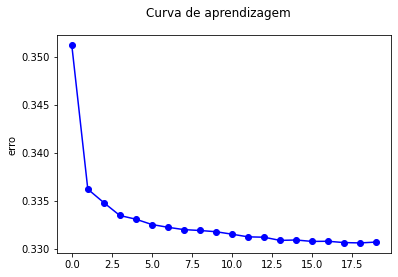

In [ ]:
#Curva de aprendizagem
plt.plot(np.arange(total), errors, 'b-o')
plt.suptitle('Curva de aprendizagem')
plt.ylabel('erro')
plt.show()

# Accuracy

In [ ]:
def accuracy(p, X, labels):
    #X.shape == (60.000, 784)
    #labels.shape == (1, 60.000)
    hits = 0
    total = X.shape[0]
    for i in range(total):
        y = p.forward(X[i,:])
        number = np.argmax(y)
        #if(i % 1000 == 0):
          #print('classe calculada: ', number, '\tclasse esperada: ', labels[i])
        if(number == labels[i]):
            hits += 1
    print('Acertos = ' + str(hits) + '/' + str(total))
    return hits / total

In [ ]:
imgs_val = read_imgs('t10k-images-idx3-ubyte')
labels_val = read_labels('t10k-labels-idx1-ubyte')

In [ ]:
imgs_val = reshape_imgs(imgs_val)

In [ ]:
print('accuracy = ' + "{:.2f}".format(accuracy(p, X, labels)*100.00) + '%')
print('accuracy = ', "{:.2f}".format(accuracy(p, imgs_val, labels_val)*100.00), '%')

Acertos = 58983/60000
accuracy = 98.30%
Acertos = 9700/10000
accuracy =  97.00 %


# Dúvidas
- Fórmula do erro:
->Porquê dividimos por dois?
-> Relação entre a função de ativação e o erro (Utilização da derivada da função de ativação no cálculo da Descida do Gradiente, porque?)
- Funções da descida do gradiente
- Como obter 100% de acertos?
- Salvar estado de pesos e bias após executar treinamento